# Documentation

# Sample Notebook To Build a Model and Make Predictions with the Plant Seedlings Dataset from Kaggle - Autokeras


Table of Contents
1. [Acquisitor and Cleaner](#Acquisitor-and-Cleaner)
2. [Training Preparator](#Training-Preparator)
3. [Trainer](#Trainer)
4. [Metrics Evaluator](#Metrics-Evaluator)
5. [Prediction Preparator](#Prediction-Preparator)
6. [Predictor](#Predictor)

# Acquisitor and Cleaner

In [1]:
!pip install keras tensorflow==2.1
import numpy as np
from sklearn.model_selection import train_test_split
from marvin_python_toolbox.common.image_loader import ImageLoader

marvin_initial_dataset = ImageLoader.reader("plant",shape=(51,51))

Start fill train_dict:   0%|                        | 1/4750 [00:00<09:20,  8.47it/s]

Root:
/home/bruno/marvin/data/plant
Dirs:
['train', 'test']
Root:
/home/bruno/marvin/data/plant/train
Dirs:
['Shepherds Purse', 'Maize', 'Cleavers', 'Small-flowered Cranesbill', 'Common wheat', 'Common Chickweed', 'Fat Hen', 'Charlock', 'Sugar beet', 'Scentless Mayweed', 'Black-grass', 'Loose Silky-bent']


Start fill test_dict: 100%|########################| 794/794 [00:10<00:00, 73.22it/s]


# Training Preparator

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

train_dict, test_dict = marvin_initial_dataset
X_dataset = np.array(train_dict['image'])
y_dataset = np.array(train_dict['class'])

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.33, random_state=42)

le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
print(y_train_encoded)

marvin_dataset = {'train_X': X_train, 'train_y': y_train_encoded, 'test_X': X_test, 'test_y': y_test_encoded}

[ 5  6  5 ... 11  8 10]


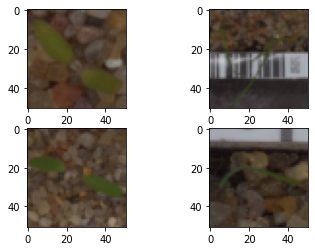

In [3]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[2])
plt.subplot(224)
plt.imshow(X_train[3])

plt.show()

# Trainer

In [4]:
import autokeras as ak
# Initialize the ImageClassifier.
clf = ak.ImageClassifier(max_trials=1)
# Search for the best model.
clf.fit(marvin_dataset['train_X'], marvin_dataset['train_y'], epochs=1)

marvin_model = clf


Train for 80 steps, validate for 20 steps
80/80 [==============================] - ETA: 49s - loss: 2.6754 - accuracy: 0.062 - ETA: 29s - loss: 3.2192 - accuracy: 0.156 - ETA: 21s - loss: 3.2777 - accuracy: 0.145 - ETA: 18s - loss: 3.3133 - accuracy: 0.140 - ETA: 15s - loss: 3.1294 - accuracy: 0.137 - ETA: 14s - loss: 3.0046 - accuracy: 0.140 - ETA: 13s - loss: 2.9179 - accuracy: 0.151 - ETA: 12s - loss: 2.8588 - accuracy: 0.144 - ETA: 11s - loss: 2.8153 - accuracy: 0.142 - ETA: 11s - loss: 2.7643 - accuracy: 0.156 - ETA: 10s - loss: 2.7368 - accuracy: 0.147 - ETA: 10s - loss: 2.7024 - accuracy: 0.153 - ETA: 9s - loss: 2.6689 - accuracy: 0.163 - ETA: 9s - loss: 2.6453 - accuracy: 0.16 - ETA: 9s - loss: 2.6199 - accuracy: 0.16 - ETA: 9s - loss: 2.6007 - accuracy: 0.16 - ETA: 8s - loss: 2.5873 - accuracy: 0.16 - ETA: 8s - loss: 2.5659 - accuracy: 0.16 - ETA: 8s - loss: 2.5505 - accuracy: 0.17 - ETA: 7s - loss: 2.5368 - accuracy: 0.16 - ETA: 7s - loss: 2.5181 - accuracy: 0.17 - ETA: 7s - 

INFO:tensorflow:Oracle triggered exit
Train for 100 steps, validate for 20 steps
100/100 [==============================] - ETA: 58s - loss: 2.4946 - accuracy: 0.218 - ETA: 34s - loss: 3.1448 - accuracy: 0.203 - ETA: 26s - loss: 3.1615 - accuracy: 0.187 - ETA: 22s - loss: 3.2130 - accuracy: 0.156 - ETA: 20s - loss: 3.0594 - accuracy: 0.137 - ETA: 18s - loss: 2.9705 - accuracy: 0.130 - ETA: 17s - loss: 2.8866 - accuracy: 0.138 - ETA: 16s - loss: 2.8329 - accuracy: 0.132 - ETA: 15s - loss: 2.7852 - accuracy: 0.125 - ETA: 14s - loss: 2.7373 - accuracy: 0.134 - ETA: 14s - loss: 2.7116 - accuracy: 0.130 - ETA: 13s - loss: 2.6838 - accuracy: 0.135 - ETA: 12s - loss: 2.6575 - accuracy: 0.137 - ETA: 12s - loss: 2.6336 - accuracy: 0.131 - ETA: 12s - loss: 2.6032 - accuracy: 0.137 - ETA: 11s - loss: 2.5795 - accuracy: 0.142 - ETA: 11s - loss: 2.5614 - accuracy: 0.147 - ETA: 11s - loss: 2.5392 - accuracy: 0.154 - ETA: 11s - loss: 2.5192 - accuracy: 0.162 - ETA: 11s - loss: 2.5046 - accuracy: 0.16

In [5]:
from keras.models import model_from_json
import keras
try:
    model = clf.export_model()
    print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>
except:
    print("Model has been created")

try:
    model.save("model_autokeras", save_format="tf")
    model.save("model_autokeras.h5")
except:
    print("Model has been created")

from tensorflow.keras.models import load_model

loaded_model = load_model("model_autokeras",custom_objects=ak.CUSTOM_OBJECTS,compile=True)


Using TensorFlow backend.


<class 'tensorflow.python.keras.engine.training.Model'>
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_autokeras/assets


# Metrics Evaluator

In [6]:
from marvin_python_toolbox.common.image_loader import ImageLoader

CLASS = dict(zip(ImageLoader.get_class_names("plant"), [x for x in range(0,12)]))
INV_CLASS = {v: k for k, v in CLASS.items()}

# Evaluate on the testing data.
prob = marvin_model.predict(marvin_dataset['test_X'])
from sklearn.metrics import accuracy_score

marvin_metrics = accuracy_score(marvin_dataset['test_y'], [INV_CLASS[p.argmax()] for p in prob])

/home/bruno/.virtualenvs/autokeras-plant-engine-env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:193: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [7]:
## Maize image

input_message = "https://i.imgur.com/07KgELs.png"

# Prediction Preparator

In [8]:
import numpy as np
from marvin_python_toolbox.common.image_loader import ImageLoader
input_message = input_message
img = ImageLoader.img_to_predict(input_message,shape=(51,51))
img = np.expand_dims(img, axis=0)
input_message = img

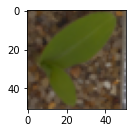

In [9]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(img[0])

# Predictor

In [11]:
from marvin_python_toolbox.common.image_loader import ImageLoader
CLASS = dict(zip(ImageLoader.get_class_names("plant"), [x for x in range(0,12)]))
INV_CLASS = {v: k for k, v in CLASS.items()}

final_prediction = INV_CLASS[marvin_model.predict(input_message).argmax()]
